# Optimal capacity

This notebook contains different visualization of the online and built capacity.

In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports                                                     
from utils import get_data
from utils import get_data_sftp
from utils import tech_order, tech_colors

from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline 
%matplotlib qt

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.2f}'.format


#### Notebook constants

In [4]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
scenario_name = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14',
                 's15','s16','s17','s18','s19','s20','s21','s22','s23','s24','s25']
savefig = False
folder_to_save_results="results_v2/"

figure_names={'s1':1,'s2':2,'s3':3,'s4':4,'s5':5,'s6':6,'s7':7,'s8':8,'s9':9,'s10':10,'s11':11,'s12':12,'s13':13,
              's14':14,'s15':15,'s16':16,'s17':17,'s18':18,'s19':19,'s20':20,'s21':21,'s22':22,'s23':23,'s24':24,
              's25':25}

## Reading scenario results

In [5]:
# Name of output/input file to read
fname = "generation_projects_info.csv"

# Selection of columns from input/output files. This speeds-up
# reading time.
columns = [
    "GENERATION_PROJECT",
    "gen_load_zone",
    "gen_tech",
    "gen_min_build_capacity",
    "gen_capacity_limit_mw",
]

# Get generation projects info csv
gen_projects = get_data_sftp(hostname, username, scenario_name, fname, fpath="inputs", usecols=columns)


In [6]:
gen_projects=gen_projects.replace({"scenario": figure_names})
gen_projects = gen_projects.astype({'scenario':'int'})
gen_projects

,GENERATION_PROJECT,gen_tech,gen_load_zone,gen_capacity_limit_mw,gen_min_build_capacity,tech_map,scenario
0,77333,Wind,CA_SCE_CEN,43,0,Wind,1
1,77334,Wind,CA_SCE_CEN,50,0,Wind,1
2,77335,Wind,CA_SCE_CEN,49,0,Wind,1
3,77336,Wind,CA_SCE_CEN,92,0,Wind,1
4,77337,Wind,CA_SCE_CEN,66,0,Wind,1
...,...,...,...,...,...,...,...
10523,1400000197,Offshore_Wind,CA_SCE_CEN,1191.5257,0,Offshore_Wind,25
10524,1400000198,Offshore_Wind,CA_SCE_S,3354.2365,0,Offshore_Wind,25
10525,1400000199,Offshore_Wind,CA_PGE_S,4194.1813,0,Offshore_Wind,25
10526,1400000200,Offshore_Wind,CA_SDGE,6103.3985,0,Offshore_Wind,25


In [32]:
gen_projects.to_csv('gen_projects.csv',index=False)

In [7]:
set(gen_projects['tech_map'])

{'Biomass',
 'CSP',
 'Coal',
 'Geothermal',
 'Hydro',
 'Nuclear',
 'Offshore_Wind',
 'Pumped Hydro',
 'Solar',
 'Storage',
 'Thermal',
 'Wave',
 'Wind'}

In [8]:
# Name of output/input file to read
fname = "gen_cap.csv"

columns = [
    "GENERATION_PROJECT",
    "PERIOD",
    "gen_tech",
    "gen_load_zone",
    "GenCapacity",
]

#Get buildGen csv
gen_cap = get_data_sftp(hostname, username, scenario_name, fname, usecols=columns)
gen_cap=gen_cap.replace({"scenario": figure_names})
gen_cap = gen_cap.astype({'scenario':'int'})
gen_cap


,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario
0,77333,2020,Wind,CA_SCE_CEN,0.00,Wind,1
1,77333,2030,Wind,CA_SCE_CEN,0.00,Wind,1
2,77333,2040,Wind,CA_SCE_CEN,43.00,Wind,1
3,77333,2050,Wind,CA_SCE_CEN,43.00,Wind,1
4,77334,2020,Wind,CA_SCE_CEN,0.00,Wind,1
...,...,...,...,...,...,...,...
36441,1400000200,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,25
36442,1400000201,2020,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,25
36443,1400000201,2030,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,25
36444,1400000201,2040,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,25


### Enter the year to analyze

In [9]:
analysis_year=2050
year_gen_cap=gen_cap.copy()
year_gen_cap=gen_cap[gen_cap['PERIOD']==analysis_year]
year_gen_cap.reset_index(inplace=True,drop=True)
year_gen_cap

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario
0,77333,2050,Wind,CA_SCE_CEN,43.00,Wind,1
1,77334,2050,Wind,CA_SCE_CEN,50.00,Wind,1
2,77335,2050,Wind,CA_SCE_CEN,49.00,Wind,1
3,77336,2050,Wind,CA_SCE_CEN,92.00,Wind,1
4,77337,2050,Wind,CA_SCE_CEN,66.00,Wind,1
...,...,...,...,...,...,...,...
207195,1400000197,2050,Offshore_Wind,CA_SCE_CEN,0.00,Offshore_Wind,25
207196,1400000198,2050,Offshore_Wind,CA_SCE_S,0.00,Offshore_Wind,25
207197,1400000199,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,25
207198,1400000200,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,25


## Data transformations

In [10]:
# MW to GW
year_gen_cap.insert(5,"GenCapacity_GW",year_gen_cap["GenCapacity"] / 1e3  )
year_gen_cap


,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,GenCapacity_GW,tech_map,scenario
0,77333,2050,Wind,CA_SCE_CEN,43.00,0.04,Wind,1
1,77334,2050,Wind,CA_SCE_CEN,50.00,0.05,Wind,1
2,77335,2050,Wind,CA_SCE_CEN,49.00,0.05,Wind,1
3,77336,2050,Wind,CA_SCE_CEN,92.00,0.09,Wind,1
4,77337,2050,Wind,CA_SCE_CEN,66.00,0.07,Wind,1
...,...,...,...,...,...,...,...,...
207195,1400000197,2050,Offshore_Wind,CA_SCE_CEN,0.00,0.00,Offshore_Wind,25
207196,1400000198,2050,Offshore_Wind,CA_SCE_S,0.00,0.00,Offshore_Wind,25
207197,1400000199,2050,Offshore_Wind,CA_PGE_S,0.00,0.00,Offshore_Wind,25
207198,1400000200,2050,Offshore_Wind,CA_SDGE,0.00,0.00,Offshore_Wind,25


In [37]:
year_gen_cap.to_csv('year_gen_cap.csv',index=False)

## Generation capacity in WECC

In [11]:
year_gen_cap_by_scenario = year_gen_cap.pivot_table(
    index=["scenario"],
    columns="tech_map",
    values="GenCapacity_GW",
    aggfunc=np.sum,
)

#year_gen_cap_by_scenario.columns = year_gen_cap_by_scenario.columns.add_categories(['Total_GW'])
year_gen_cap_by_scenario.reindex(columns=["tech_map"])
year_gen_cap_by_scenario = year_gen_cap_by_scenario#.fillna(0)
year_gen_cap_by_scenario.loc[:,'Total_GW']=year_gen_cap_by_scenario.apply(lambda x: sum(x[c] for c in year_gen_cap_by_scenario.columns), axis=1)
year_gen_cap_by_scenario.sort_index(axis=1,ascending=True,inplace=True)
#year_gen_cap_by_scenario = year_gen_cap_by_scenario[['Biomass','CSP','Coal','Geothermal','Hydro','Nuclear','Offshore_Wind','Pumped Hydro','Solar','Storage','Thermal','Wave','Wind','Total_GW']]
year_gen_cap_by_scenario.T.to_latex(folder_to_save_results+"Generation capacity in WECC.tex",index=True,
                                  float_format='%.1f',
                                  caption="Generation capacity in WECC")
year_gen_cap_by_scenario

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_80432/1717201749.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  year_gen_cap_by_scenario.T.to_latex(folder_to_save_results+"Generation capacity in WECC.tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
1,10.89,0.00,1.71,0.74,63.33,5.41,3.13,4.33,346.81,165.51,46.36,829.09,3.02,177.84
2,10.56,0.00,1.71,0.74,63.33,5.41,3.13,4.33,343.20,163.85,46.71,826.71,7.27,176.47
3,10.64,0.00,1.71,0.74,63.33,5.41,3.11,4.33,337.30,161.07,46.79,823.58,14.36,174.80
4,10.74,0.00,1.71,0.74,63.33,5.41,3.05,4.33,323.67,153.49,46.83,820.52,34.14,173.07
5,10.93,0.00,1.71,0.74,63.33,5.41,3.05,4.33,320.15,152.07,46.94,820.04,39.36,172.02
6,10.89,0.00,1.71,0.74,63.33,5.41,4.00,4.33,344.42,164.56,46.24,826.44,2.93,177.89
7,10.57,0.00,1.71,0.74,63.33,5.41,4.00,4.33,341.48,163.30,46.61,824.50,7.04,175.99
8,10.54,0.00,1.71,0.74,63.33,5.41,3.96,4.33,335.42,160.29,46.68,821.43,14.31,174.71
9,10.72,0.00,1.71,0.74,63.33,5.41,3.80,4.33,322.16,153.15,46.78,818.35,34.11,172.11


In [39]:
latex_code = year_gen_cap_by_scenario.T.to_latex(index=False)

latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)

\begin{tabular}{rrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
    1  &     2  &     3  &     4  &     5  &     6  &     7  &     8  &     9  &     10 &     11 &     12 &     13 &     14 &     15 &     16 &     17 &     18 &     19 &     20 &     21 &     22 &     23 &     24 &     25 \\ \hline
 10.89 &  10.56 &  10.64 &  10.74 &  10.93 &  10.89 &  10.57 &  10.54 &  10.72 &  10.93 &   9.75 &   9.75 &   9.73 &   9.62 &   9.55 &   9.11 &   9.10 &   8.94 &   9.01 &   9.22 &   8.26 &   8.30 &   8.34 &   8.39 &   8.32 \\ \hline
\midrule
  0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 \\ \hline
  1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 \\ \hline
  0.74 

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_44881/314988464.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = year_gen_cap_by_scenario.T.to_latex(index=False)


In [12]:
wave_cap_scen_map = pd.DataFrame(range(1,6))
wave_cap_scen_map = wave_cap_scen_map.rename(columns={0:'1'})
wave_cap_scen_map['2'] = 0
wave_cap_scen_map['3'] = 0
wave_cap_scen_map['4'] = 0
wave_cap_scen_map['5'] = 0
wave_cap_scen_map

,1,2,3,4,5
0,1,0,0,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,0,0,0,0
4,5,0,0,0,0


In [13]:
for i in range(1,6):
    wave_cap_scen_map.loc[i-1,'1'] = year_gen_cap_by_scenario.loc[i,'Wave']

for i in range(6,11):
    wave_cap_scen_map.loc[i-6,'2'] = year_gen_cap_by_scenario.loc[i,'Wave']

for i in range(11,16):
    wave_cap_scen_map.loc[i-11,'3'] = year_gen_cap_by_scenario.loc[i,'Wave']

for i in range(16,21):
    wave_cap_scen_map.loc[i-16,'4'] = year_gen_cap_by_scenario.loc[i,'Wave']

for i in range(21,26):
    wave_cap_scen_map.loc[i-21,'5'] = year_gen_cap_by_scenario.loc[i,'Wave']

wave_cap_scen_map = wave_cap_scen_map.rename(index={0:1,1:2,2:3,3:4,4:5})
wave_cap_scen_map

,1,2,3,4,5
1,3.02,2.93,2.28,2.28,1.98
2,7.27,7.04,4.96,3.02,2.28
3,14.36,14.31,11.49,9.24,7.02
4,34.14,34.11,30.31,22.47,21.34
5,39.36,39.36,39.06,38.83,35.92


In [14]:
wave_cap_scen_map_for_paper = wave_cap_scen_map.copy()
wave_cap_scen_map_for_paper = wave_cap_scen_map_for_paper.rename(columns={'1':'$4,746','2':'$4,458','3':'$3,468','4':'$3,017','5':'$2,728'})
wave_cap_scen_map_for_paper = wave_cap_scen_map_for_paper.rename(index={1:'$1,462',2:'$1,333',3:'$760',4:'$618',5:'$400'})
wave_cap_scen_map_for_paper = wave_cap_scen_map_for_paper.style.background_gradient(cmap="YlOrRd",axis=None).set_precision(2)
wave_cap_scen_map_for_paper

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_80432/857592583.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  wave_cap_scen_map_for_paper = wave_cap_scen_map_for_paper.style.background_gradient(cmap="YlOrRd",axis=None).set_precision(2)


,"$4,746","$4,458","$3,468","$3,017","$2,728"
"$1,462",3.02,2.93,2.28,2.28,1.98
"$1,333",7.27,7.04,4.96,3.02,2.28
$760,14.36,14.31,11.49,9.24,7.02
$618,34.14,34.11,30.31,22.47,21.34
$400,39.36,39.36,39.06,38.83,35.92


In [15]:
def df_style(val):
    return "font-weight: bold"

In [111]:
pd.DataFrame(wave_cap_scen_map_for_paper.index).style.applymap(df_style)

,0
0,"$1,462"
1,"$1,333"
2,$760
3,$618
4,$400


In [124]:
wave_cap_scen_map.T.to_latex(folder_to_save_results+"Wave_Energy_Capacity_Built_Per_Scenario.tex",index=True,
                                  float_format='%.1f',
                                  caption="Wave Energy Capacity Built Per Scenario")

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_89268/2927639286.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  wave_cap_scen_map.T.to_latex(folder_to_save_results+"Wave_Energy_Capacity_Built_Per_Scenario.tex",index=True,


In [16]:
wave_cap_by_scen_list = []
for i in range(1,len(wave_cap_scen_map)+1):
    row_list = wave_cap_scen_map.loc[i, :].values.flatten().tolist()
    wave_cap_by_scen_list = wave_cap_by_scen_list + row_list
wave_cap_by_scen_list

[3.0154859999999997,
 2.9337359999999997,
 2.283187,
 2.283187,
 1.981187,
 7.2747544,
 7.0380574,
 4.961266,
 3.0150859999999997,
 2.283187,
 14.3597025,
 14.3087225,
 11.494026,
 9.240734999999999,
 7.024235399999999,
 34.1437446,
 34.1110646,
 30.3080086,
 22.4698805,
 21.3402955,
 39.3643666,
 39.3643666,
 39.0593266,
 38.8276916,
 35.9160616]

In [14]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
y3 = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
z3 = np.zeros(25)

dx = np.ones(25)
dy = np.ones(25)
dz = wave_cap_by_scen_list

cmap = cm.get_cmap('YlOrRd')
norm = Normalize(vmin=0, vmax=40)
colors = cmap(norm(dz))

sc = cm.ScalarMappable(cmap=cmap,norm=norm)
sc.set_array([])
cbar = plt.colorbar(sc, fraction=0.03, pad = 0.15)
cbar.ax.set_ylabel('Wave Energy Built Capacity (GW)', rotation=270, fontsize = 8, labelpad=15)
cbar.ax.tick_params(labelsize=8)

ax1.bar3d(x3, y3, z3, dx, dy, dz, color=colors)

ax1.set_xlabel('Floating Offshore Wind\nEnergy Overnight Costs',fontsize=8, labelpad=20)
ax1.set_ylabel('Wave Energy\nOvernight Costs',fontsize=8, labelpad=20)
ax1.set_zlabel('Wave Energy Built Capacity (GW)',fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8)

x_labels = [item.get_text() for item in ax1.get_xticklabels()]
x_labels[1] = '$4,746/kW'
x_labels[2] = '$4,458/kW'
x_labels[3] = '$3,468/kW'
x_labels[4] = '$3,017/kW'
x_labels[5] = '$2,728/kW'
ax1.set_xticklabels(x_labels)
plt.setp(ax1.get_xticklabels(), rotation=30)

y_labels = [item.get_text() for item in ax1.get_yticklabels()]
y_labels[3] = '$1,462/kW'
y_labels[4] = '$1,333/kW'
y_labels[5] = '$760/kW'
y_labels[6] = '$618/kW'
y_labels[7] = '$400/kW'
ax1.set_yticklabels(y_labels)
plt.setp(ax1.get_yticklabels(), rotation=-10)

plt.show()

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_28206/2455970653.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_28206/2455970653.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_labels)


In [24]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111, projection='3d')

x = [1462,1462,1462,1462,1462,
      1333.32,1333.32,1333.32,1333.32,1333.32,
      760,760,760,760,760,
      617.61,617.61,617.61,617.61,617.61,
      400,400,400,400,400]
y = [3135.11,2846.87,2163.12,1870.09,1581.85,
      3135.11,2846.87,2163.12,1870.09,1581.85,
      3135.11,2846.87,2163.12,1870.09,1581.85,
      3135.11,2846.87,2163.12,1870.09,1581.85,
      3135.11,2846.87,2163.12,1870.09,1581.85]
z = [3.015486,2.933736,2.283187,2.283187,1.981187,
      7.274754,7.038057,4.961266,3.015086,2.283187,
      14.359702,14.308723,11.494026,9.240735,7.024235,
      34.143745,34.111065,30.308009,22.469880,21.340295,
      39.364367,39.364367,39.059327,38.827692,35.916062]

cmap = cm.get_cmap('YlOrRd')
norm = Normalize(vmin=min(z), vmax=max(z))
colors = cmap(norm(z))

sc = cm.ScalarMappable(cmap=cmap,norm=norm)
sc.set_array([])
plt.colorbar(sc)

ax1.scatter3D(x, y, z, color=colors)

ax1.set_xlabel('Fixed Offshore Wind\nEnergy Overnight Costs ($/kW)')
ax1.set_ylabel('Wave Energy\n Overnight Costs ($/kW)')
ax1.set_zlabel('Wave Energy Built Capacity (GW)')

ax1.tick_params(axis='both', which='major', labelsize=6)

plt.show()

In [69]:
wave_cap_scen_map.to_csv('wave_cap_built_per_scen_MW.csv')

In [17]:
osw_cap_scen_map = pd.DataFrame(range(1,6))
osw_cap_scen_map = osw_cap_scen_map.rename(columns={0:'1'})
osw_cap_scen_map['2'] = 0
osw_cap_scen_map['3'] = 0
osw_cap_scen_map['4'] = 0
osw_cap_scen_map['5'] = 0
osw_cap_scen_map

,1,2,3,4,5
0,1,0,0,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,0,0,0,0
4,5,0,0,0,0


In [18]:
for i in range(1,6):
    osw_cap_scen_map.loc[i-1,'1'] = year_gen_cap_by_scenario.loc[i,'Offshore_Wind']

for i in range(6,11):
    osw_cap_scen_map.loc[i-6,'2'] = year_gen_cap_by_scenario.loc[i,'Offshore_Wind']

for i in range(11,16):
    osw_cap_scen_map.loc[i-11,'3'] = year_gen_cap_by_scenario.loc[i,'Offshore_Wind']

for i in range(16,21):
    osw_cap_scen_map.loc[i-16,'4'] = year_gen_cap_by_scenario.loc[i,'Offshore_Wind']

for i in range(21,26):
    osw_cap_scen_map.loc[i-21,'5'] = year_gen_cap_by_scenario.loc[i,'Offshore_Wind']

osw_cap_scen_map = osw_cap_scen_map.rename(index={0:1,1:2,2:3,3:4,4:5})
osw_cap_scen_map#.style.background_gradient(cmap="Reds")

,1,2,3,4,5
1,3.13,4.00,25.26,37.00,48.96
2,3.13,4.00,24.83,36.69,48.69
3,3.11,3.96,23.37,35.51,47.15
4,3.05,3.80,20.19,33.03,43.92
5,3.05,3.80,19.66,28.70,40.67


In [19]:
osw_cap_scen_map_for_paper = osw_cap_scen_map.copy()
osw_cap_scen_map_for_paper = osw_cap_scen_map_for_paper.rename(columns={'1':'$4,746','2':'$4,458','3':'$3,468','4':'$3,017','5':'$2,728'})
osw_cap_scen_map_for_paper = osw_cap_scen_map_for_paper.rename(index={1:'$1,462',2:'$1,333',3:'$760',4:'$618',5:'$400'})
osw_cap_scen_map_for_paper = osw_cap_scen_map_for_paper.style.background_gradient(cmap="Blues",axis=None).set_precision(2)
osw_cap_scen_map_for_paper

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_80432/1064160057.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  osw_cap_scen_map_for_paper = osw_cap_scen_map_for_paper.style.background_gradient(cmap="Blues",axis=None).set_precision(2)


,"$4,746","$4,458","$3,468","$3,017","$2,728"
"$1,462",3.13,4.00,25.26,37.00,48.96
"$1,333",3.13,4.00,24.83,36.69,48.69
$760,3.11,3.96,23.37,35.51,47.15
$618,3.05,3.80,20.19,33.03,43.92
$400,3.05,3.80,19.66,28.70,40.67


In [112]:
osw_cap_scen_map.style.background_gradient(cmap="Blues",axis=None).set_precision(2)

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_4364/3507602890.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  osw_cap_scen_map.style.background_gradient(cmap="Blues",axis=None).set_precision(2)


,1,2,3,4,5
1,3.13,4.00,25.26,37.00,48.96
2,3.13,4.00,24.83,36.69,48.69
3,3.11,3.96,23.37,35.51,47.15
4,3.05,3.80,20.19,33.03,43.92
5,3.05,3.80,19.66,28.70,40.67


In [15]:
osw_cap_scen_map.to_csv('osw_cap_built_per_scen_MW.csv')

In [18]:
osw_cap_by_scen_list = []
for i in range(1,len(osw_cap_scen_map)+1):
    row_list = osw_cap_scen_map.loc[i, :].values.flatten().tolist()
    osw_cap_by_scen_list = osw_cap_by_scen_list + row_list
osw_cap_by_scen_list

[3.130702,
 3.995911,
 25.264091,
 37.002521,
 48.955425,
 3.130702,
 3.995911,
 24.829091000000002,
 36.689941,
 48.691715,
 3.106854,
 3.959142,
 23.365421,
 35.508001,
 47.154055,
 3.050937,
 3.80439,
 20.188352,
 33.028301,
 43.916315,
 3.050937,
 3.80439,
 19.661371,
 28.703981,
 40.670825]

In [19]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
y3 = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
z3 = np.zeros(25)

dx = np.ones(25)
dy = np.ones(25)
dz = osw_cap_by_scen_list

cmap = cm.get_cmap('Blues')
norm = Normalize(vmin=0, vmax=50)
colors = cmap(norm(dz))

sc = cm.ScalarMappable(cmap=cmap,norm=norm)
sc.set_array([])
cbar = plt.colorbar(sc, fraction=0.03, pad = 0.15)
cbar.ax.set_ylabel('Offshore Wind Energy Built Capacity (GW)', rotation=270, fontsize = 8, labelpad=15)
cbar.ax.tick_params(labelsize=8)

ax1.bar3d(x3, y3, z3, dx, dy, dz, color=colors)

ax1.set_xlabel('Floating Offshore Wind\nEnergy Overnight Costs',fontsize=8, labelpad=20)
ax1.set_ylabel('Wave Energy\nOvernight Costs',fontsize=8, labelpad=20)
ax1.set_zlabel('Offshore Wind Energy Built Capacity (GW)',fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8, pad=5)

x_labels = [item.get_text() for item in ax1.get_xticklabels()]
x_labels[1] = '$4,746/kW'
x_labels[2] = '$4,458/kW'
x_labels[3] = '$3,468/kW'
x_labels[4] = '$3,017/kW'
x_labels[5] = '$2,728/kW'
ax1.set_xticklabels(x_labels)
plt.setp(ax1.get_xticklabels(), rotation=30)

y_labels = [item.get_text() for item in ax1.get_yticklabels()]
y_labels[3] = '$1,462/kW'
y_labels[4] = '$1,333/kW'
y_labels[5] = '$760/kW'
y_labels[6] = '$618/kW'
y_labels[7] = '$400/kW'
ax1.set_yticklabels(y_labels)
plt.setp(ax1.get_yticklabels(), rotation=-10)

plt.show()

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_44881/2189094667.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_44881/2189094667.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_labels)


In [20]:
storage_cap_scen_map = pd.DataFrame(range(1,6))
storage_cap_scen_map = storage_cap_scen_map.rename(columns={0:'1'})
storage_cap_scen_map['2'] = 0
storage_cap_scen_map['3'] = 0
storage_cap_scen_map['4'] = 0
storage_cap_scen_map['5'] = 0
storage_cap_scen_map

,1,2,3,4,5
0,1,0,0,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,0,0,0,0
4,5,0,0,0,0


In [21]:
for i in range(1,6):
    storage_cap_scen_map.loc[i-1,'1'] = year_gen_cap_by_scenario.loc[i,'Storage']

for i in range(6,11):
    storage_cap_scen_map.loc[i-6,'2'] = year_gen_cap_by_scenario.loc[i,'Storage']

for i in range(11,16):
    storage_cap_scen_map.loc[i-11,'3'] = year_gen_cap_by_scenario.loc[i,'Storage']

for i in range(16,21):
    storage_cap_scen_map.loc[i-16,'4'] = year_gen_cap_by_scenario.loc[i,'Storage']

for i in range(21,26):
    storage_cap_scen_map.loc[i-21,'5'] = year_gen_cap_by_scenario.loc[i,'Storage']

storage_cap_scen_map = storage_cap_scen_map.rename(index={0:1,1:2,2:3,3:4,4:5})
storage_cap_scen_map.style.background_gradient(cmap="PuBuGn",axis=None)

,1,2,3,4,5
1,165.510810,164.557176,139.253870,123.109692,115.926594
2,163.845080,163.295704,138.420050,123.384429,115.978721
3,161.066286,160.285052,137.694590,123.307182,115.912648
4,153.489210,153.146719,136.891570,122.678954,114.272650
5,152.067790,151.452641,135.327990,125.343048,114.983931


In [23]:
storage_cap_scen_map_for_paper = storage_cap_scen_map.copy()
storage_cap_scen_map_for_paper = storage_cap_scen_map_for_paper.rename(columns={'1':'$4,746','2':'$4,458','3':'$3,468','4':'$3,017','5':'$2,728'})
storage_cap_scen_map_for_paper = storage_cap_scen_map_for_paper.rename(index={1:'$1,462',2:'$1,333',3:'$760',4:'$618',5:'$400'})
storage_cap_scen_map_for_paper = storage_cap_scen_map_for_paper.style.background_gradient(cmap="PuBuGn",axis=None).set_precision(2)
storage_cap_scen_map_for_paper

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_80432/3438254732.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  storage_cap_scen_map_for_paper = storage_cap_scen_map_for_paper.style.background_gradient(cmap="PuBuGn",axis=None).set_precision(2)


,"$4,746","$4,458","$3,468","$3,017","$2,728"
"$1,462",165.51,164.56,139.25,123.11,115.93
"$1,333",163.85,163.30,138.42,123.38,115.98
$760,161.07,160.29,137.69,123.31,115.91
$618,153.49,153.15,136.89,122.68,114.27
$400,152.07,151.45,135.33,125.34,114.98


In [22]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
y3 = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
z3 = np.zeros(25)

dx = np.ones(25)
dy = np.ones(25)
dz = storage_cap_by_scen_list

cmap = cm.get_cmap('PuBuGn')
norm = Normalize(vmin=110, vmax=170)
colors = cmap(norm(dz))

sc = cm.ScalarMappable(cmap=cmap,norm=norm)
sc.set_array([])
cbar = plt.colorbar(sc, fraction=0.03, pad = 0.15)
cbar.ax.set_ylabel('Energy Storage Built Capacity (GW)', rotation=270, fontsize = 8, labelpad=15)
cbar.ax.tick_params(labelsize=8)

ax1.bar3d(x3, y3, z3, dx, dy, dz, color=colors)

ax1.set_xlabel('Floating Offshore Wind\nEnergy Overnight Costs',fontsize=8, labelpad=20)
ax1.set_ylabel('Wave Energy\nOvernight Costs',fontsize=8, labelpad=20)
ax1.set_zlabel('Energy Storage Built Capacity (GW)',fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8, pad=5)

x_labels = [item.get_text() for item in ax1.get_xticklabels()]
x_labels[1] = '$4,746/kW'
x_labels[2] = '$4,458/kW'
x_labels[3] = '$3,468/kW'
x_labels[4] = '$3,017/kW'
x_labels[5] = '$2,728/kW'
ax1.set_xticklabels(x_labels)
plt.setp(ax1.get_xticklabels(), rotation=30)

y_labels = [item.get_text() for item in ax1.get_yticklabels()]
y_labels[3] = '$1,462/kW'
y_labels[4] = '$1,333/kW'
y_labels[5] = '$760/kW'
y_labels[6] = '$618/kW'
y_labels[7] = '$400/kW'
ax1.set_yticklabels(y_labels)
plt.setp(ax1.get_yticklabels(), rotation=-10)

plt.show()

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_28206/778684060.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_28206/778684060.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_labels)


In [24]:
solar_cap_scen_map = pd.DataFrame(range(1,6))
solar_cap_scen_map = solar_cap_scen_map.rename(columns={0:'1'})
solar_cap_scen_map['2'] = 0
solar_cap_scen_map['3'] = 0
solar_cap_scen_map['4'] = 0
solar_cap_scen_map['5'] = 0
solar_cap_scen_map

,1,2,3,4,5
0,1,0,0,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,0,0,0,0
4,5,0,0,0,0


In [25]:
for i in range(1,6):
    solar_cap_scen_map.loc[i-1,'1'] = year_gen_cap_by_scenario.loc[i,'Solar']

for i in range(6,11):
    solar_cap_scen_map.loc[i-6,'2'] = year_gen_cap_by_scenario.loc[i,'Solar']

for i in range(11,16):
    solar_cap_scen_map.loc[i-11,'3'] = year_gen_cap_by_scenario.loc[i,'Solar']

for i in range(16,21):
    solar_cap_scen_map.loc[i-16,'4'] = year_gen_cap_by_scenario.loc[i,'Solar']

for i in range(21,26):
    solar_cap_scen_map.loc[i-21,'5'] = year_gen_cap_by_scenario.loc[i,'Solar']

solar_cap_scen_map = solar_cap_scen_map.rename(index={0:1,1:2,2:3,3:4,4:5})
solar_cap_scen_map.style.background_gradient(cmap="Wistia",axis=None)

,1,2,3,4,5
1,346.811356,344.417713,289.581771,260.818470,241.681953
2,343.198627,341.475534,288.398843,260.837107,241.844611
3,337.301481,335.423407,285.407854,259.340445,241.463293
4,323.668540,322.156248,283.349777,256.727092,237.029922
5,320.152136,318.668096,280.720276,259.088089,237.848585


In [26]:
solar_cap_scen_map_for_paper = solar_cap_scen_map.copy()
solar_cap_scen_map_for_paper = solar_cap_scen_map_for_paper.rename(columns={'1':'$4,746','2':'$4,458','3':'$3,468','4':'$3,017','5':'$2,728'})
solar_cap_scen_map_for_paper = solar_cap_scen_map_for_paper.rename(index={1:'$1,462',2:'$1,333',3:'$760',4:'$618',5:'$400'})
solar_cap_scen_map_for_paper = solar_cap_scen_map_for_paper.style.background_gradient(cmap="Wistia",axis=None).set_precision(2)
solar_cap_scen_map_for_paper

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_80432/3036178013.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  solar_cap_scen_map_for_paper = solar_cap_scen_map_for_paper.style.background_gradient(cmap="Wistia",axis=None).set_precision(2)


,"$4,746","$4,458","$3,468","$3,017","$2,728"
"$1,462",346.81,344.42,289.58,260.82,241.68
"$1,333",343.20,341.48,288.40,260.84,241.84
$760,337.30,335.42,285.41,259.34,241.46
$618,323.67,322.16,283.35,256.73,237.03
$400,320.15,318.67,280.72,259.09,237.85


In [25]:
solar_cap_by_scen_list = []
for i in range(1,len(solar_cap_scen_map)+1):
    row_list = solar_cap_scen_map.loc[i, :].values.flatten().tolist()
    solar_cap_by_scen_list = solar_cap_by_scen_list + row_list
solar_cap_by_scen_list

[346.811356,
 344.417713,
 289.581771,
 260.81847,
 241.681953,
 343.198627,
 341.4755341,
 288.398843,
 260.8371069,
 241.8446107,
 337.3014806,
 335.423407,
 285.4078545,
 259.3404446,
 241.463293,
 323.6685398,
 322.1562483,
 283.3497771,
 256.72709199999997,
 237.029922,
 320.152136,
 318.668096,
 280.720276,
 259.088089,
 237.848585]

In [26]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
y3 = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
z3 = np.zeros(25)

dx = np.ones(25)
dy = np.ones(25)
dz = solar_cap_by_scen_list

cmap = cm.get_cmap('Wistia')
norm = Normalize(vmin=230, vmax=350)
colors = cmap(norm(dz))

sc = cm.ScalarMappable(cmap=cmap,norm=norm)
sc.set_array([])
cbar = plt.colorbar(sc, fraction=0.03, pad = 0.15)
cbar.ax.set_ylabel('Solar Energy Built Capacity (GW)', rotation=270, fontsize = 8, labelpad=15)
cbar.ax.tick_params(labelsize=8)

ax1.bar3d(x3, y3, z3, dx, dy, dz, color=colors)

ax1.set_xlabel('Floating Offshore Wind\nEnergy Overnight Costs',fontsize=8, labelpad=20)
ax1.set_ylabel('Wave Energy\nOvernight Costs',fontsize=8, labelpad=20)
ax1.set_zlabel('Solar Energy Built Capacity (GW)',fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8, pad=5)

x_labels = [item.get_text() for item in ax1.get_xticklabels()]
x_labels[1] = '$4,746/kW'
x_labels[2] = '$4,458/kW'
x_labels[3] = '$3,468/kW'
x_labels[4] = '$3,017/kW'
x_labels[5] = '$2,728/kW'
ax1.set_xticklabels(x_labels)
plt.setp(ax1.get_xticklabels(), rotation=30)

y_labels = [item.get_text() for item in ax1.get_yticklabels()]
y_labels[3] = '$1,462/kW'
y_labels[4] = '$1,333/kW'
y_labels[5] = '$760/kW'
y_labels[6] = '$618/kW'
y_labels[7] = '$400/kW'
ax1.set_yticklabels(y_labels)
plt.setp(ax1.get_yticklabels(), rotation=-10)

plt.show()

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_28206/1830589256.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_28206/1830589256.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_labels)


In [27]:
total_gen_cap_scen_map = pd.DataFrame(range(1,6))
total_gen_cap_scen_map = total_gen_cap_scen_map.rename(columns={0:'1'})
total_gen_cap_scen_map['2'] = 0
total_gen_cap_scen_map['3'] = 0
total_gen_cap_scen_map['4'] = 0
total_gen_cap_scen_map['5'] = 0
total_gen_cap_scen_map

,1,2,3,4,5
0,1,0,0,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,0,0,0,0
4,5,0,0,0,0


In [28]:
for i in range(1,6):
    total_gen_cap_scen_map.loc[i-1,'1'] = year_gen_cap_by_scenario.loc[i,'Total_GW']

for i in range(6,11):
    total_gen_cap_scen_map.loc[i-6,'2'] = year_gen_cap_by_scenario.loc[i,'Total_GW']

for i in range(11,16):
    total_gen_cap_scen_map.loc[i-11,'3'] = year_gen_cap_by_scenario.loc[i,'Total_GW']

for i in range(16,21):
    total_gen_cap_scen_map.loc[i-16,'4'] = year_gen_cap_by_scenario.loc[i,'Total_GW']

for i in range(21,26):
    total_gen_cap_scen_map.loc[i-21,'5'] = year_gen_cap_by_scenario.loc[i,'Total_GW']

total_gen_cap_scen_map = total_gen_cap_scen_map.rename(index={0:1,1:2,2:3,3:4,4:5})
total_gen_cap_scen_map.style.background_gradient(cmap="YlGn",axis=None)

,1,2,3,4,5
1,829.086211,826.439819,768.211249,734.644618,711.799518
2,826.707770,824.497666,767.371682,734.959177,711.794193
3,823.583477,821.426379,767.604980,734.939966,712.343747
4,820.516799,818.349867,773.382490,737.695813,715.338823
5,820.039068,817.937468,774.945200,750.239739,724.987292


In [29]:
total_gen_cap_scen_map_for_paper = total_gen_cap_scen_map.copy()
total_gen_cap_scen_map_for_paper = total_gen_cap_scen_map_for_paper.rename(columns={'1':'$4,746','2':'$4,458','3':'$3,468','4':'$3,017','5':'$2,728'})
total_gen_cap_scen_map_for_paper = total_gen_cap_scen_map_for_paper.rename(index={1:'$1,462',2:'$1,333',3:'$760',4:'$618',5:'$400'})
total_gen_cap_scen_map_for_paper = total_gen_cap_scen_map_for_paper.style.background_gradient(cmap="YlGn",axis=None).set_precision(2)
total_gen_cap_scen_map_for_paper

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_80432/2655544391.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  total_gen_cap_scen_map_for_paper = total_gen_cap_scen_map_for_paper.style.background_gradient(cmap="YlGn",axis=None).set_precision(2)


,"$4,746","$4,458","$3,468","$3,017","$2,728"
"$1,462",829.09,826.44,768.21,734.64,711.80
"$1,333",826.71,824.50,767.37,734.96,711.79
$760,823.58,821.43,767.60,734.94,712.34
$618,820.52,818.35,773.38,737.70,715.34
$400,820.04,817.94,774.95,750.24,724.99


In [29]:
total_gen_cap_by_scen_list = []
for i in range(1,len(total_gen_cap_scen_map)+1):
    row_list = total_gen_cap_scen_map.loc[i, :].values.flatten().tolist()
    total_gen_cap_by_scen_list = total_gen_cap_by_scen_list + row_list
total_gen_cap_by_scen_list

[829.0862114600001,
 826.43981946,
 768.21124908,
 734.64461784,
 711.79951835,
 826.70777008,
 824.4976663799999,
 767.37168168,
 734.9591774400001,
 711.7941927400001,
 823.5834771799999,
 821.4263787,
 767.6049800799999,
 734.9399656799999,
 712.34374685,
 820.5167992199999,
 818.34986712,
 773.38249048,
 737.69581308,
 715.3388227500001,
 820.03906812,
 817.93746822,
 774.94520048,
 750.23973918,
 724.98729191]

In [30]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
y3 = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
z3 = np.zeros(25)

dx = np.ones(25)
dy = np.ones(25)
dz = total_gen_cap_by_scen_list

cmap = cm.get_cmap('YlGn')
norm = Normalize(vmin=700, vmax=830)
colors = cmap(norm(dz))

sc = cm.ScalarMappable(cmap=cmap,norm=norm)
sc.set_array([])
cbar = plt.colorbar(sc, fraction=0.03, pad = 0.15)
cbar.ax.set_ylabel('Total Generation Built Capacity (GW)', rotation=270, fontsize = 8, labelpad=15)
cbar.ax.tick_params(labelsize=8)

ax1.bar3d(x3, y3, z3, dx, dy, dz, color=colors)

ax1.set_xlabel('Floating Offshore Wind\nEnergy Overnight Costs',fontsize=8, labelpad=20)
ax1.set_ylabel('Wave Energy\nOvernight Costs',fontsize=8, labelpad=20)
ax1.set_zlabel('Total Generation Built Capacity (GW)',fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8, pad=5)

x_labels = [item.get_text() for item in ax1.get_xticklabels()]
x_labels[1] = '$4,746/kW'
x_labels[2] = '$4,458/kW'
x_labels[3] = '$3,468/kW'
x_labels[4] = '$3,017/kW'
x_labels[5] = '$2,728/kW'
ax1.set_xticklabels(x_labels)
plt.setp(ax1.get_xticklabels(), rotation=30)

y_labels = [item.get_text() for item in ax1.get_yticklabels()]
y_labels[3] = '$1,462/kW'
y_labels[4] = '$1,333/kW'
y_labels[5] = '$760/kW'
y_labels[6] = '$618/kW'
y_labels[7] = '$400/kW'
ax1.set_yticklabels(y_labels)
plt.setp(ax1.get_yticklabels(), rotation=-10)

plt.show()

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_28206/2936851571.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_28206/2936851571.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_labels)


In [17]:
sc= list(year_gen_cap_by_scenario.index)
plot_1=sc[0:5]
plot_2=sc[5:10]
plot_3=sc[10:15]
plot_4=sc[15:20]
plot_5=sc[20:25]
group_1 = year_gen_cap_by_scenario.loc[plot_1,:]
group_2 = year_gen_cap_by_scenario.loc[plot_2,:]
group_3 = year_gen_cap_by_scenario.loc[plot_3,:]
group_4 = year_gen_cap_by_scenario.loc[plot_4,:]
group_5 = year_gen_cap_by_scenario.loc[plot_5,:]

# sc= list(year_gen_cap_by_scenario.index)
# p0 = sc[0]
# plot_1=sc[0:int(round(len(sc)/2,0))]
# plot_2=[p0]+ sc[int(round(len(sc)/2,0)):int(len(sc))]
# group_1 = year_gen_cap_by_scenario.loc[plot_1,:]
# group_2 = year_gen_cap_by_scenario.loc[plot_2,:]

In [12]:
group_1

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
1,10.89,0.00,1.71,0.74,63.33,5.41,3.13,4.33,346.81,165.51,46.36,829.09,3.02,177.84
2,10.56,0.00,1.71,0.74,63.33,5.41,3.13,4.33,343.20,163.85,46.71,826.71,7.27,176.47
3,10.64,0.00,1.71,0.74,63.33,5.41,3.11,4.33,337.30,161.07,46.79,823.58,14.36,174.80
4,10.74,0.00,1.71,0.74,63.33,5.41,3.05,4.33,323.67,153.49,46.83,820.52,34.14,173.07
5,10.93,0.00,1.71,0.74,63.33,5.41,3.05,4.33,320.15,152.07,46.94,820.04,39.36,172.02


In [13]:
group_2

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
6,10.89,0.00,1.71,0.74,63.33,5.41,4.00,4.33,344.42,164.56,46.24,826.44,2.93,177.89
7,10.57,0.00,1.71,0.74,63.33,5.41,4.00,4.33,341.48,163.30,46.61,824.50,7.04,175.99
8,10.54,0.00,1.71,0.74,63.33,5.41,3.96,4.33,335.42,160.29,46.68,821.43,14.31,174.71
9,10.72,0.00,1.71,0.74,63.33,5.41,3.80,4.33,322.16,153.15,46.78,818.35,34.11,172.11
10,10.93,0.00,1.71,0.74,63.33,5.41,3.80,4.33,318.67,151.45,46.88,817.94,39.36,171.33


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
1,10.89,0.00,1.71,0.74,63.33,5.41,3.13,4.33,346.81,165.51,46.36,829.09,3.02,177.84
2,10.56,0.00,1.71,0.74,63.33,5.41,3.13,4.33,343.20,163.85,46.71,826.71,7.27,176.47
3,10.64,0.00,1.71,0.74,63.33,5.41,3.11,4.33,337.30,161.07,46.79,823.58,14.36,174.80
4,10.74,0.00,1.71,0.74,63.33,5.41,3.05,4.33,323.67,153.49,46.83,820.52,34.14,173.07
5,10.93,0.00,1.71,0.74,63.33,5.41,3.05,4.33,320.15,152.07,46.94,820.04,39.36,172.02


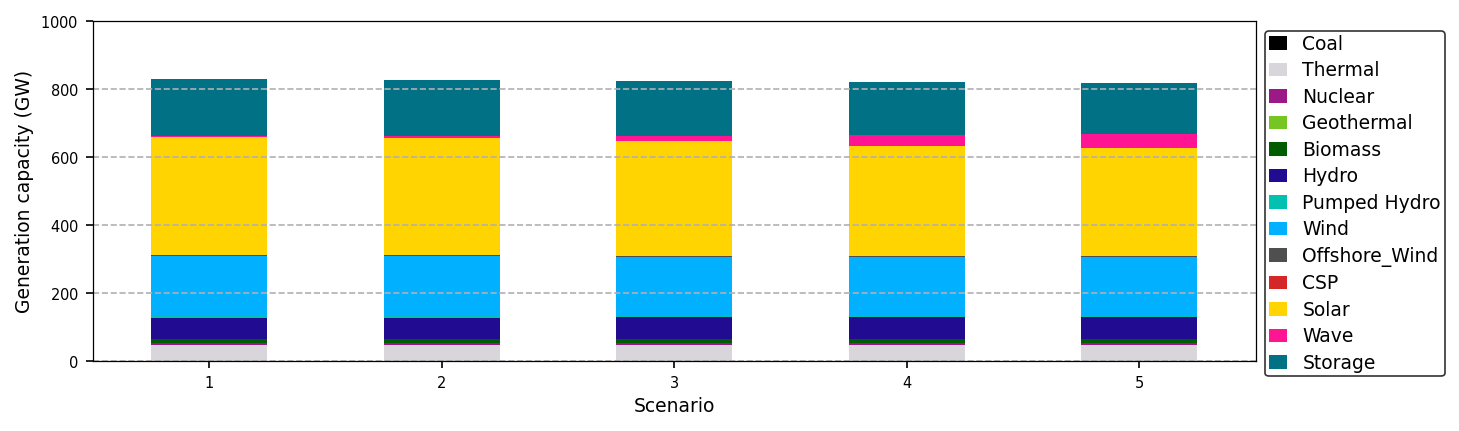

In [14]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_1[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation capacity (GW)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Generation capacity (GW) in WECC Scenarios 1-5.png", transparent=False)

#Rename for spaces purposes
#data=gen_cap_by_scenario.rename(index={"Baseline":"Base",
                                     #  "Period_rate_90":"Period_90",
                                     #  "Period_rate_100":"Period_100",
                                     #  "Timepoint_rate_100":"Tp_100",
                                     #  "Zero_tx_expansion": "ZeroTxExp",
                                     #  "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
#data.T.to_latex(folder_to_save_results+"Generation capacity (GW) in WECC.tex",index=True,
                                #  float_format='%.2f',
                                # caption="Generation capacity (GW) in WECC")

#Show dataframe
group_1

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
6,10.89,0.00,1.71,0.74,63.33,5.41,4.00,4.33,344.42,164.56,46.24,826.44,2.93,177.89
7,10.57,0.00,1.71,0.74,63.33,5.41,4.00,4.33,341.48,163.30,46.61,824.50,7.04,175.99
8,10.54,0.00,1.71,0.74,63.33,5.41,3.96,4.33,335.42,160.29,46.68,821.43,14.31,174.71
9,10.72,0.00,1.71,0.74,63.33,5.41,3.80,4.33,322.16,153.15,46.78,818.35,34.11,172.11
10,10.93,0.00,1.71,0.74,63.33,5.41,3.80,4.33,318.67,151.45,46.88,817.94,39.36,171.33


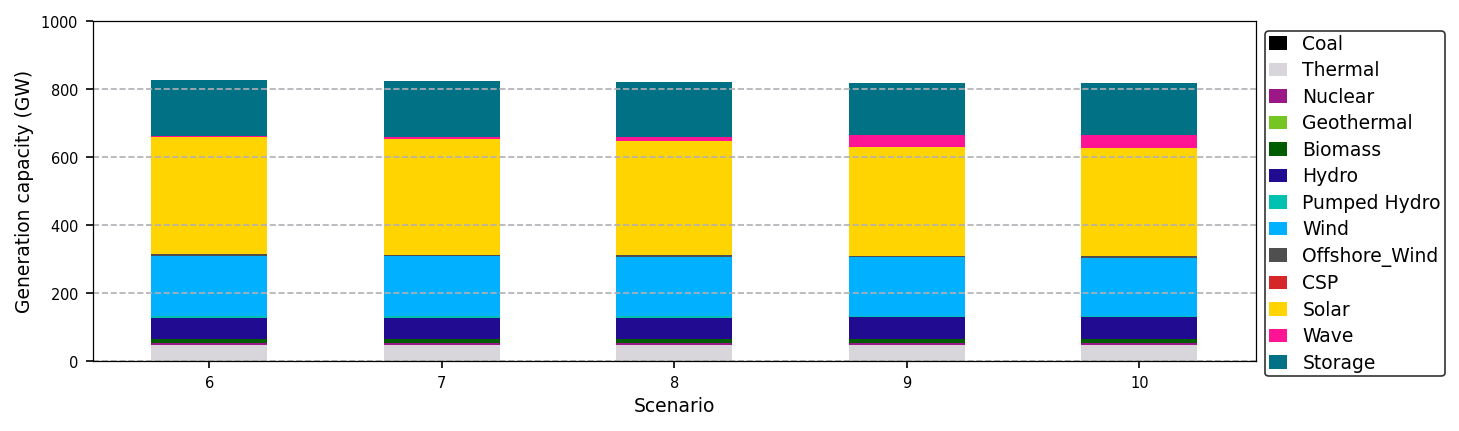

In [15]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_2[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation capacity (GW)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Generation capacity (GW) in WECC Scenarios 6-10.png", transparent=False)

#Rename for spaces purposes
#data=gen_cap_by_scenario.rename(index={"Baseline":"Base",
                                     #  "Period_rate_90":"Period_90",
                                     #  "Period_rate_100":"Period_100",
                                     #  "Timepoint_rate_100":"Tp_100",
                                     #  "Zero_tx_expansion": "ZeroTxExp",
                                     #  "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
#data.T.to_latex(folder_to_save_results+"Generation capacity (GW) in WECC.tex",index=True,
                                #  float_format='%.2f',
                                # caption="Generation capacity (GW) in WECC")

#Show dataframe
group_2

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
11,9.75,0.00,1.71,0.00,63.33,5.41,25.26,4.33,289.58,139.25,46.66,768.21,2.28,180.64
12,9.75,0.00,1.71,0.00,63.33,5.41,24.83,4.33,288.40,138.42,46.65,767.37,4.96,179.58
13,9.73,0.00,1.71,0.00,63.33,5.41,23.37,4.33,285.41,137.69,46.66,767.60,11.49,178.47
14,9.62,0.00,1.71,0.00,63.33,5.41,20.19,4.33,283.35,136.89,46.73,773.38,30.31,171.51
15,9.55,0.00,1.71,0.00,63.33,5.41,19.66,4.33,280.72,135.33,46.63,774.95,39.06,169.21


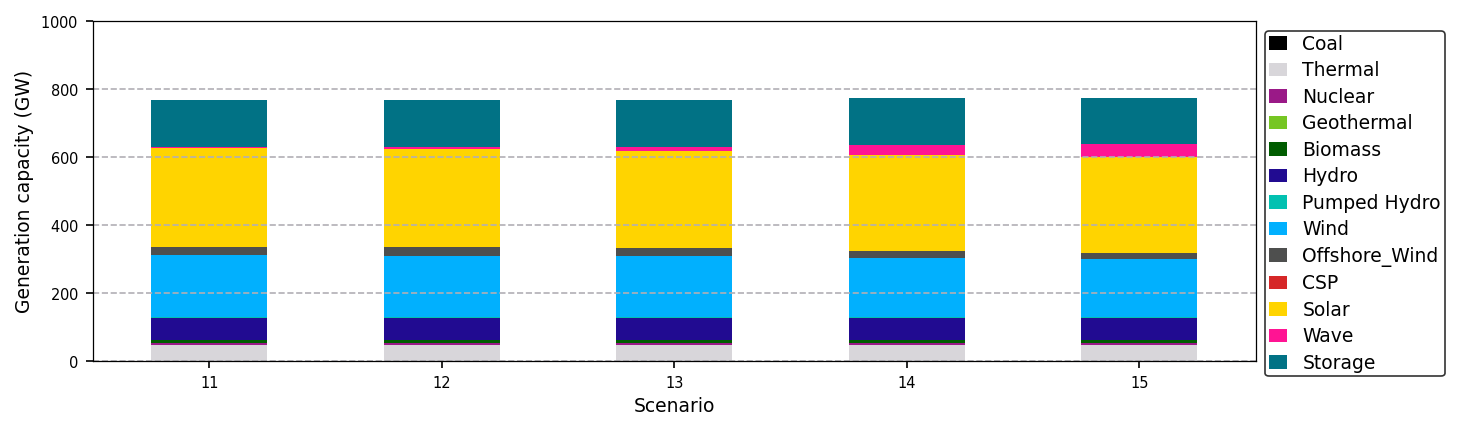

In [16]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_3[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation capacity (GW)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Generation capacity (GW) in WECC Scenarios 11-15.png", transparent=False)

#Rename for spaces purposes
#data=gen_cap_by_scenario.rename(index={"Baseline":"Base",
                                     #  "Period_rate_90":"Period_90",
                                     #  "Period_rate_100":"Period_100",
                                     #  "Timepoint_rate_100":"Tp_100",
                                     #  "Zero_tx_expansion": "ZeroTxExp",
                                     #  "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
#data.T.to_latex(folder_to_save_results+"Generation capacity (GW) in WECC.tex",index=True,
                                #  float_format='%.2f',
                                # caption="Generation capacity (GW) in WECC")

#Show dataframe
group_3

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
16,9.11,0.00,1.71,0.00,63.33,5.41,37.00,4.33,260.82,123.11,45.86,734.64,2.28,181.68
17,9.10,0.00,1.71,0.00,63.33,5.41,36.69,4.33,260.84,123.38,45.87,734.96,3.02,181.27
18,8.94,0.00,1.71,0.00,63.33,5.41,35.51,4.33,259.34,123.31,45.87,734.94,9.24,177.95
19,9.01,0.00,1.71,0.00,63.33,5.41,33.03,4.33,256.73,122.68,45.79,737.70,22.47,173.21
20,9.22,0.00,1.71,0.00,63.33,5.41,28.70,4.33,259.09,125.34,45.81,750.24,38.83,168.47


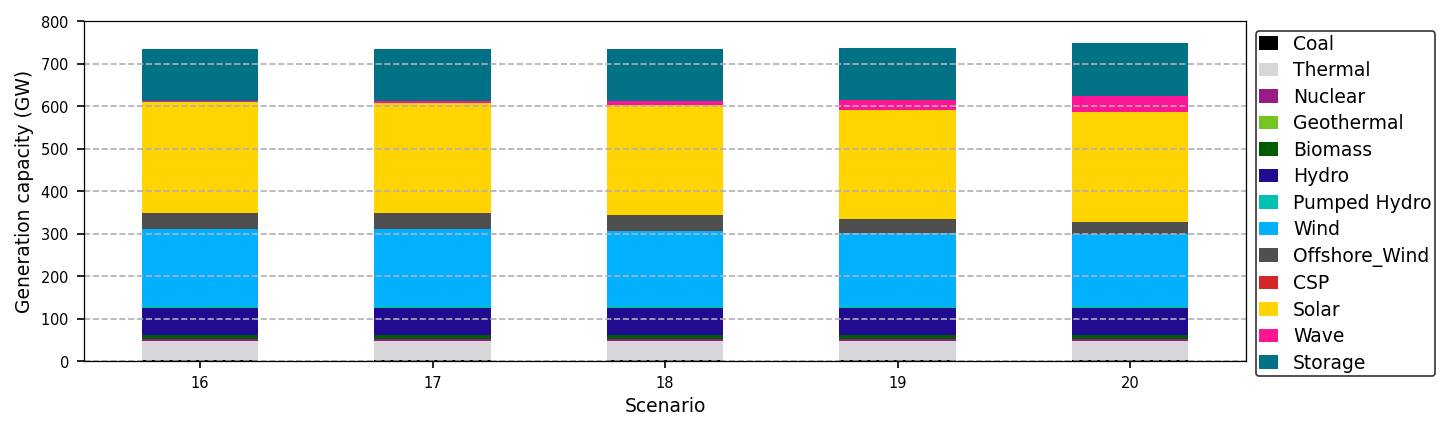

In [17]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_4[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation capacity (GW)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Generation capacity (GW) in WECC Scenarios 16-20.png", transparent=False)

#Rename for spaces purposes
#data=gen_cap_by_scenario.rename(index={"Baseline":"Base",
                                     #  "Period_rate_90":"Period_90",
                                     #  "Period_rate_100":"Period_100",
                                     #  "Timepoint_rate_100":"Tp_100",
                                     #  "Zero_tx_expansion": "ZeroTxExp",
                                     #  "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
#data.T.to_latex(folder_to_save_results+"Generation capacity (GW) in WECC.tex",index=True,
                                #  float_format='%.2f',
                                # caption="Generation capacity (GW) in WECC")

#Show dataframe
group_4

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
21,8.26,0.00,1.71,0.00,63.33,5.41,48.96,4.33,241.68,115.93,44.60,711.80,1.98,175.61
22,8.30,0.00,1.71,0.00,63.33,5.41,48.69,4.33,241.84,115.98,44.60,711.79,2.28,175.31
23,8.34,0.00,1.71,0.00,63.33,5.41,47.15,4.33,241.46,115.91,44.60,712.34,7.02,173.07
24,8.39,0.00,1.71,0.00,63.33,5.41,43.92,4.33,237.03,114.27,44.57,715.34,21.34,171.03
25,8.32,0.00,1.71,0.00,63.33,5.41,40.67,4.33,237.85,114.98,44.62,724.99,35.92,167.85


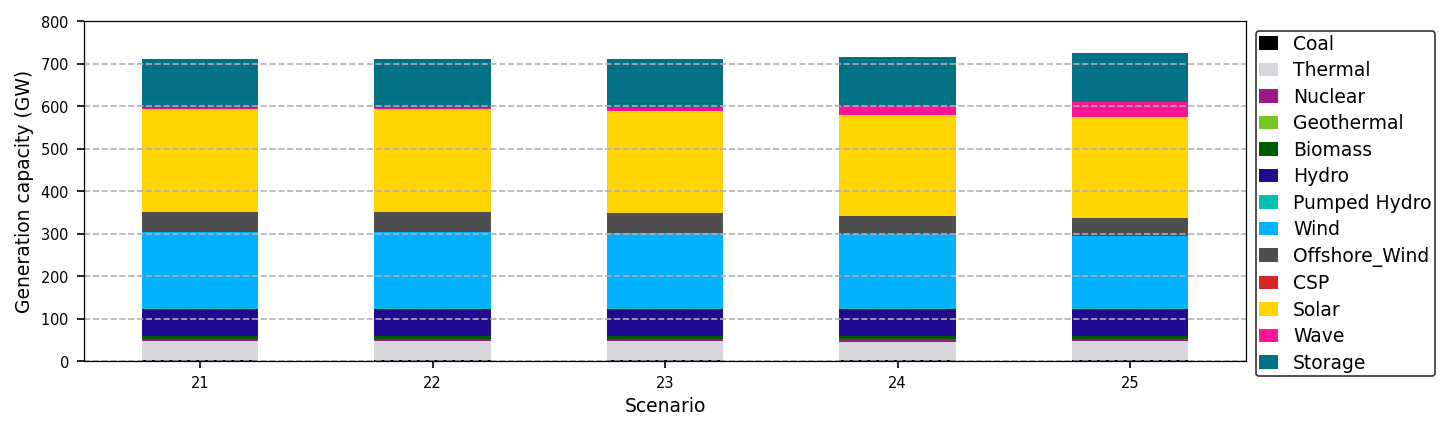

In [18]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_5[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation capacity (GW)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Generation capacity (GW) in WECC Scenarios 21-25.png", transparent=False)

#Rename for spaces purposes
#data=gen_cap_by_scenario.rename(index={"Baseline":"Base",
                                     #  "Period_rate_90":"Period_90",
                                     #  "Period_rate_100":"Period_100",
                                     #  "Timepoint_rate_100":"Tp_100",
                                     #  "Zero_tx_expansion": "ZeroTxExp",
                                     #  "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
#data.T.to_latex(folder_to_save_results+"Generation capacity (GW) in WECC.tex",index=True,
                                #  float_format='%.2f',
                                # caption="Generation capacity (GW) in WECC")

#Show dataframe
group_5

In [125]:
year_gen_cap_by_scenario

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
1,10.89,0.00,1.71,0.74,63.33,5.41,3.13,4.33,346.81,165.51,46.36,829.09,3.02,177.84
2,10.56,0.00,1.71,0.74,63.33,5.41,3.13,4.33,343.20,163.85,46.71,826.71,7.27,176.47
3,10.64,0.00,1.71,0.74,63.33,5.41,3.11,4.33,337.30,161.07,46.79,823.58,14.36,174.80
4,10.74,0.00,1.71,0.74,63.33,5.41,3.05,4.33,323.67,153.49,46.83,820.52,34.14,173.07
5,10.93,0.00,1.71,0.74,63.33,5.41,3.05,4.33,320.15,152.07,46.94,820.04,39.36,172.02
6,10.89,0.00,1.71,0.74,63.33,5.41,4.00,4.33,344.42,164.56,46.24,826.44,2.93,177.89
7,10.57,0.00,1.71,0.74,63.33,5.41,4.00,4.33,341.48,163.30,46.61,824.50,7.04,175.99
8,10.54,0.00,1.71,0.74,63.33,5.41,3.96,4.33,335.42,160.29,46.68,821.43,14.31,174.71
9,10.72,0.00,1.71,0.74,63.33,5.41,3.80,4.33,322.16,153.15,46.78,818.35,34.11,172.11


In [26]:
year_gen_cap_by_scenario.to_csv('year_gen_cap_by_scenario.csv')

In [30]:
techs = gen_projects['tech_map'].unique()
techs

['Wind', 'Thermal', 'Hydro', 'Coal', 'Pumped Hydro', ..., 'Biomass', 'Storage', 'CSP', 'Offshore_Wind', 'Wave']
Length: 13
Categories (13, object): ['Biomass', 'CSP', 'Coal', 'Geothermal', ..., 'Storage', 'Thermal', 'Wave', 'Wind']

In [31]:
build_gen_cap_by_scenario_percentage = year_gen_cap_by_scenario.copy()
for t in techs:
    build_gen_cap_by_scenario_percentage.loc[:,t] = build_gen_cap_by_scenario_percentage.apply(lambda x:x[t]*100/x['Total_GW'], axis=1)
build_gen_cap_by_scenario_percentage.drop(columns='Total_GW', axis=1, inplace=True)

build_gen_cap_by_scenario_percentage.loc[:,'Total']=build_gen_cap_by_scenario_percentage.apply(lambda x: sum(x[c] for c in build_gen_cap_by_scenario_percentage.columns), axis=1)
build_gen_cap_by_scenario_percentage.T.to_latex(folder_to_save_results+"Generation capacity (percentage) in WECC.tex",index=True,
                                  float_format='%.1f',
                                  caption="Generation capacity (percentage) in WECC")
build_gen_cap_by_scenario_percentage

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_80432/1965211326.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  build_gen_cap_by_scenario_percentage.T.to_latex(folder_to_save_results+"Generation capacity (percentage) in WECC.tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total
scenario,,,,,,,,,,,,,,
1,1.31,0.00,0.21,0.09,7.64,0.65,0.38,0.52,41.83,19.96,5.59,0.36,21.45,100.00
2,1.28,0.00,0.21,0.09,7.66,0.65,0.38,0.52,41.51,19.82,5.65,0.88,21.35,100.00
3,1.29,0.00,0.21,0.09,7.69,0.66,0.38,0.53,40.96,19.56,5.68,1.74,21.22,100.00
4,1.31,0.00,0.21,0.09,7.72,0.66,0.37,0.53,39.45,18.71,5.71,4.16,21.09,100.00
5,1.33,0.00,0.21,0.09,7.72,0.66,0.37,0.53,39.04,18.54,5.72,4.80,20.98,100.00
6,1.32,0.00,0.21,0.09,7.66,0.65,0.48,0.52,41.67,19.91,5.59,0.35,21.52,100.00
7,1.28,0.00,0.21,0.09,7.68,0.66,0.48,0.53,41.42,19.81,5.65,0.85,21.35,100.00
8,1.28,0.00,0.21,0.09,7.71,0.66,0.48,0.53,40.83,19.51,5.68,1.74,21.27,100.00
9,1.31,0.00,0.21,0.09,7.74,0.66,0.46,0.53,39.37,18.71,5.72,4.17,21.03,100.00


In [32]:
wave_build_gen_cap_percentage_scen_map = pd.DataFrame(range(1,6))
wave_build_gen_cap_percentage_scen_map = wave_build_gen_cap_percentage_scen_map.rename(columns={0:'1'})
wave_build_gen_cap_percentage_scen_map['2'] = 0
wave_build_gen_cap_percentage_scen_map['3'] = 0
wave_build_gen_cap_percentage_scen_map['4'] = 0
wave_build_gen_cap_percentage_scen_map['5'] = 0

for i in range(1,6):
    wave_build_gen_cap_percentage_scen_map.loc[i-1,'1'] = build_gen_cap_by_scenario_percentage.loc[i,'Wave']

for i in range(6,11):
    wave_build_gen_cap_percentage_scen_map.loc[i-6,'2'] = build_gen_cap_by_scenario_percentage.loc[i,'Wave']

for i in range(11,16):
    wave_build_gen_cap_percentage_scen_map.loc[i-11,'3'] = build_gen_cap_by_scenario_percentage.loc[i,'Wave']

for i in range(16,21):
    wave_build_gen_cap_percentage_scen_map.loc[i-16,'4'] = build_gen_cap_by_scenario_percentage.loc[i,'Wave']

for i in range(21,26):
    wave_build_gen_cap_percentage_scen_map.loc[i-21,'5'] = build_gen_cap_by_scenario_percentage.loc[i,'Wave']

wave_build_gen_cap_percentage_scen_map = wave_build_gen_cap_percentage_scen_map.rename(index={0:1,1:2,2:3,3:4,4:5})

wave_build_gen_cap_percentage_by_scen_list = []
for i in range(1,len(wave_build_gen_cap_percentage_scen_map)+1):
    row_list = wave_build_gen_cap_percentage_scen_map.loc[i, :].values.flatten().tolist()
    wave_build_gen_cap_percentage_by_scen_list = wave_build_gen_cap_percentage_by_scen_list + row_list

wave_build_gen_cap_percentage_scen_map.style.background_gradient(cmap="Reds",axis=None)

,1,2,3,4,5
1,0.363712,0.354985,0.297208,0.310788,0.278335
2,0.879967,0.853618,0.646527,0.410239,0.320765
3,1.743564,1.741936,1.497388,1.257346,0.986074
4,4.161249,4.168274,3.918890,3.045955,2.983243
5,4.800304,4.812638,5.040270,5.175371,4.954026


In [33]:
wave_build_gen_cap_percentage_scen_map_for_paper = wave_build_gen_cap_percentage_scen_map.copy()
wave_build_gen_cap_percentage_scen_map_for_paper = wave_build_gen_cap_percentage_scen_map_for_paper.rename(columns={'1':'$4,746','2':'$4,458','3':'$3,468','4':'$3,017','5':'$2,728'})
wave_build_gen_cap_percentage_scen_map_for_paper = wave_build_gen_cap_percentage_scen_map_for_paper.rename(index={1:'$1,462',2:'$1,333',3:'$760',4:'$618',5:'$400'})
wave_build_gen_cap_percentage_scen_map_for_paper = wave_build_gen_cap_percentage_scen_map_for_paper.style.background_gradient(cmap="YlOrRd",axis=None).set_precision(2)
wave_build_gen_cap_percentage_scen_map_for_paper

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_80432/3224537425.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  wave_build_gen_cap_percentage_scen_map_for_paper = wave_build_gen_cap_percentage_scen_map_for_paper.style.background_gradient(cmap="YlOrRd",axis=None).set_precision(2)


,"$4,746","$4,458","$3,468","$3,017","$2,728"
"$1,462",0.36,0.35,0.30,0.31,0.28
"$1,333",0.88,0.85,0.65,0.41,0.32
$760,1.74,1.74,1.50,1.26,0.99
$618,4.16,4.17,3.92,3.05,2.98
$400,4.80,4.81,5.04,5.18,4.95


In [34]:
osw_build_gen_cap_percentage_scen_map = pd.DataFrame(range(1,6))
osw_build_gen_cap_percentage_scen_map = osw_build_gen_cap_percentage_scen_map.rename(columns={0:'1'})
osw_build_gen_cap_percentage_scen_map['2'] = 0
osw_build_gen_cap_percentage_scen_map['3'] = 0
osw_build_gen_cap_percentage_scen_map['4'] = 0
osw_build_gen_cap_percentage_scen_map['5'] = 0

for i in range(1,6):
    osw_build_gen_cap_percentage_scen_map.loc[i-1,'1'] = build_gen_cap_by_scenario_percentage.loc[i,'Offshore_Wind']

for i in range(6,11):
    osw_build_gen_cap_percentage_scen_map.loc[i-6,'2'] = build_gen_cap_by_scenario_percentage.loc[i,'Offshore_Wind']

for i in range(11,16):
    osw_build_gen_cap_percentage_scen_map.loc[i-11,'3'] = build_gen_cap_by_scenario_percentage.loc[i,'Offshore_Wind']

for i in range(16,21):
    osw_build_gen_cap_percentage_scen_map.loc[i-16,'4'] = build_gen_cap_by_scenario_percentage.loc[i,'Offshore_Wind']

for i in range(21,26):
    osw_build_gen_cap_percentage_scen_map.loc[i-21,'5'] = build_gen_cap_by_scenario_percentage.loc[i,'Offshore_Wind']

osw_build_gen_cap_percentage_scen_map = osw_build_gen_cap_percentage_scen_map.rename(index={0:1,1:2,2:3,3:4,4:5})

osw_build_gen_cap_percentage_by_scen_list = []
for i in range(1,len(osw_build_gen_cap_percentage_scen_map)+1):
    row_list = osw_build_gen_cap_percentage_scen_map.loc[i, :].values.flatten().tolist()
    osw_build_gen_cap_percentage_by_scen_list = osw_build_gen_cap_percentage_by_scen_list + row_list

osw_build_gen_cap_percentage_scen_map.style.background_gradient(cmap="Blues",axis=None)

,1,2,3,4,5
1,0.377609,0.483509,3.288691,5.036792,6.877699
2,0.378695,0.484648,3.235602,4.992106,6.840701
3,0.377236,0.481984,3.043938,4.831415,6.619565
4,0.371831,0.464886,2.610397,4.477225,6.139233
5,0.372048,0.465120,2.537130,3.825974,5.609867


In [35]:
osw_build_gen_cap_percentage_scen_map_for_paper = osw_build_gen_cap_percentage_scen_map.copy()
osw_build_gen_cap_percentage_scen_map_for_paper = osw_build_gen_cap_percentage_scen_map_for_paper.rename(columns={'1':'$4,746','2':'$4,458','3':'$3,468','4':'$3,017','5':'$2,728'})
osw_build_gen_cap_percentage_scen_map_for_paper = osw_build_gen_cap_percentage_scen_map_for_paper.rename(index={1:'$1,462',2:'$1,333',3:'$760',4:'$618',5:'$400'})
osw_build_gen_cap_percentage_scen_map_for_paper = osw_build_gen_cap_percentage_scen_map_for_paper.style.background_gradient(cmap="Blues",axis=None).set_precision(2)
osw_build_gen_cap_percentage_scen_map_for_paper

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_80432/3949520540.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  osw_build_gen_cap_percentage_scen_map_for_paper = osw_build_gen_cap_percentage_scen_map_for_paper.style.background_gradient(cmap="Blues",axis=None).set_precision(2)


,"$4,746","$4,458","$3,468","$3,017","$2,728"
"$1,462",0.38,0.48,3.29,5.04,6.88
"$1,333",0.38,0.48,3.24,4.99,6.84
$760,0.38,0.48,3.04,4.83,6.62
$618,0.37,0.46,2.61,4.48,6.14
$400,0.37,0.47,2.54,3.83,5.61


In [27]:
build_gen_cap_by_scenario_percentage.to_csv('build_gen_cap_by_scenario_percentage.csv')

In [22]:
#Computing percentages
x=np.zeros((len(scenario_name),len(year_gen_cap_by_scenario.columns)))
for c in range(0,len(scenario_name)):
    for tec in range(0,len(year_gen_cap_by_scenario.columns)):
      x[c,tec]=100*year_gen_cap_by_scenario.loc[fig[c],year_gen_cap_by_scenario.columns[tec]]/year_gen_cap_by_scenario.loc[scenario_name[c],year_gen_cap_by_scenario.columns[len(year_gen_cap_by_scenario.columns)-1]]

build_gen_ca_by_scenario_percentage=pd.DataFrame(x,columns=year_gen_cap_by_scenario.columns,index=[scenario_name])

data=build_gen_ca_by_scenario_percentage.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)

data.T.to_latex(folder_to_save_results+"Generation capacity (percentage) in WECC.tex",index=True,
                                  float_format='%.2f',
                                  caption="Generation capacity (percentage) in WECC")
data

TypeError: 'Figure' object is not subscriptable

## Generation capacity in California

In [ ]:
#Filter the BuildGen.csv to obtain generation in California
gen_cap_ca=year_gen_cap[year_gen_cap.gen_load_zone.str.startswith('CA_')]

gen_cap_ca_by_scenario = gen_cap_ca.pivot_table(
    index=["scenario"],
    columns="tech_map",
    values="GenCapacity_GW",
    aggfunc=np.sum,
)

#Sort the pivot table by index according to the scenario_name

gen_cap_ca_by_scenario.columns = gen_cap_ca_by_scenario.columns.add_categories(['indexNumber'])
gen_cap_ca_by_scenario['indexNumber']=[scenario_name.index(gen_cap_ca_by_scenario.index[i]) for i in range(0,len(scenario_name))]
gen_cap_ca_by_scenario.sort_values(['indexNumber'], ascending = [True], inplace = True)
del gen_cap_ca_by_scenario['indexNumber']
gen_cap_ca_by_scenario.columns = gen_cap_ca_by_scenario.columns.add_categories(['total_GW'])
gen_cap_ca_by_scenario['total_GW']=[gen_cap_ca_by_scenario.sum(axis=1)[i] for i in range(0,len(scenario_name))]

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_GW
scenario,,,,,,,,,,,,,,
scenario_190,4.74,0.00,0.00,0.00,9.92,0.00,41.48,3.31,84.29,47.99,19.73,1.71,4.82,217.98
scenario_191,4.89,0.00,0.00,0.00,9.92,0.00,41.00,3.31,81.93,47.08,19.43,3.90,4.86,216.32
scenario_192,5.48,0.00,0.00,0.00,9.92,0.00,40.32,3.31,78.02,45.85,19.26,7.43,4.98,214.57
scenario_193,5.70,0.00,0.00,0.00,9.92,0.00,40.40,3.31,77.52,44.52,18.82,11.55,4.98,216.73
scenario_194,5.71,0.00,0.00,0.00,9.92,0.00,40.18,3.31,76.70,43.77,18.71,13.37,4.98,216.66
scenario_195,5.35,0.00,0.00,0.00,9.92,0.00,38.19,3.31,87.31,49.55,20.02,2.68,6.09,222.40
scenario_196,5.26,0.00,0.00,0.00,9.92,0.00,38.94,3.31,81.91,47.09,19.90,5.83,5.67,217.83
scenario_197,5.60,0.00,0.00,0.00,9.92,0.00,40.77,3.31,76.99,45.19,19.66,8.49,4.98,214.91
scenario_198,5.72,0.00,0.00,0.00,9.92,0.00,42.04,3.31,75.46,42.87,19.57,11.55,4.98,215.41


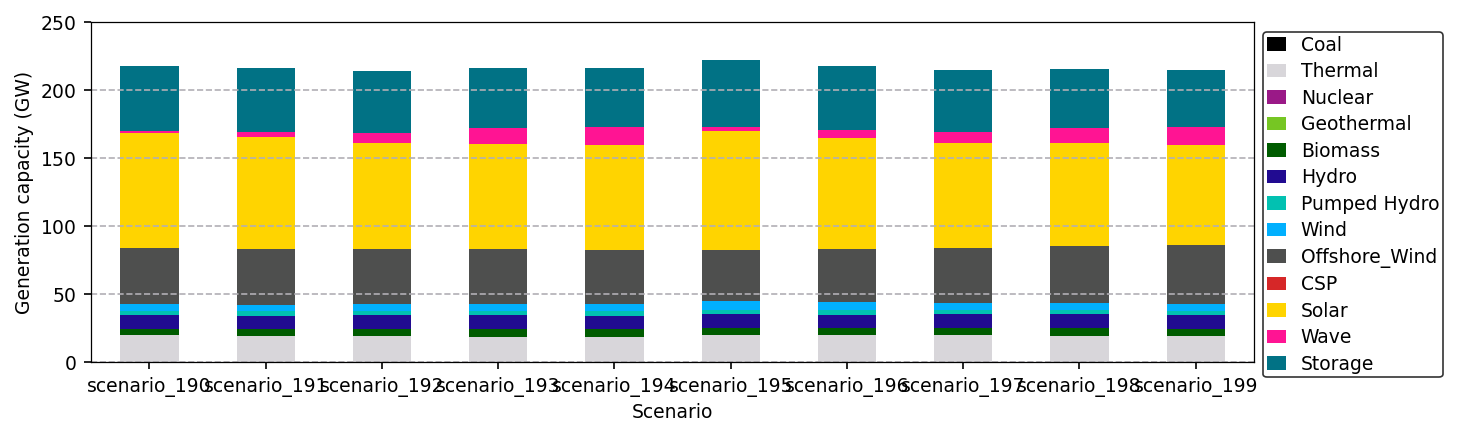

In [ ]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = gen_cap_ca_by_scenario[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation capacity (GW)", fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Generation capacity (GW) in California.png", transparent=False)

#Rename for spaces purposes
data=gen_cap_ca_by_scenario.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
data.T.to_latex(folder_to_save_results+"Generation capacity (GW) in California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Generation capacity (GW) in WECC")

#Show dataframe
gen_cap_ca_by_scenario

In [ ]:
#Computing percentages
x=np.zeros((len(scenario_name),len(gen_cap_ca_by_scenario.columns)))
for c in range(0,len(scenario_name)):
    for tec in range(0,len(gen_cap_ca_by_scenario.columns)):
      x[c,tec]=100*gen_cap_ca_by_scenario.loc[scenario_name[c],gen_cap_ca_by_scenario.columns[tec]]/gen_cap_ca_by_scenario.loc[scenario_name[c],gen_cap_ca_by_scenario.columns[len(gen_cap_ca_by_scenario.columns)-1]]

build_gen_ca_by_scenario_percentage=pd.DataFrame(x,columns=gen_cap_ca_by_scenario.columns,index=[scenario_name])

data=build_gen_ca_by_scenario_percentage.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)

data.T.to_latex(folder_to_save_results+"Generation capacity (percentage) in California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Generation capacity (percentage) in California")
data

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_GW
scenario_190,2.17,0.00,0.00,0.00,4.55,0.00,19.03,1.52,38.67,22.02,9.05,0.79,2.21,100.00
scenario_191,2.26,0.00,0.00,0.00,4.58,0.00,18.95,1.53,37.88,21.76,8.98,1.81,2.25,100.00
scenario_192,2.56,0.00,0.00,0.00,4.62,0.00,18.79,1.54,36.36,21.37,8.97,3.46,2.32,100.00
scenario_193,2.63,0.00,0.00,0.00,4.57,0.00,18.64,1.53,35.77,20.54,8.68,5.33,2.30,100.00
scenario_194,2.63,0.00,0.00,0.00,4.58,0.00,18.55,1.53,35.40,20.20,8.64,6.17,2.30,100.00
scenario_195,2.40,0.00,0.00,0.00,4.46,0.00,17.17,1.49,39.26,22.28,9.00,1.21,2.74,100.00
scenario_196,2.42,0.00,0.00,0.00,4.55,0.00,17.87,1.52,37.60,21.62,9.13,2.68,2.60,100.00
scenario_197,2.60,0.00,0.00,0.00,4.61,0.00,18.97,1.54,35.82,21.03,9.15,3.95,2.32,100.00
scenario_198,2.65,0.00,0.00,0.00,4.60,0.00,19.52,1.54,35.03,19.90,9.08,5.36,2.31,100.00
scenario_199,2.59,0.00,0.00,0.00,4.61,0.00,20.20,1.54,34.09,19.54,8.81,6.30,2.32,100.00


## Generation capacity out of California

In [ ]:
zones_ca=gen_cap[gen_cap["scenario"].isin([scenario_name[0]])]
zones_ca=list(zones_ca[zones_ca.gen_load_zone.str.startswith('CA_')].gen_load_zone)
gen_cap_ca_outca=gen_cap[~gen_cap["gen_load_zone"].isin(zones_ca)]
gen_cap_ca_outca

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario
484,77454,2020,Wind,OR_E,0.00,Wind,scenario_190
485,77454,2030,Wind,OR_E,0.00,Wind,scenario_190
486,77454,2040,Wind,OR_E,0.00,Wind,scenario_190
487,77454,2050,Wind,OR_E,0.00,Wind,scenario_190
488,77455,2020,Wind,OR_E,0.00,Wind,scenario_190
...,...,...,...,...,...,...,...
36213,1300000143,2050,Offshore_Wind,OR_W,852.98,Offshore_Wind,scenario_199
36214,1300000144,2020,Offshore_Wind,OR_W,0.00,Offshore_Wind,scenario_199
36215,1300000144,2030,Offshore_Wind,OR_W,0.00,Offshore_Wind,scenario_199
36216,1300000144,2040,Offshore_Wind,OR_W,0.00,Offshore_Wind,scenario_199


In [ ]:
gen_cap_ca_outca_by_scenario = gen_cap_ca_outca.pivot_table(
    index=["scenario"],
    columns="tech_map",
    values="GenCapacity",
    aggfunc=np.sum,
)
gen_cap_ca_outca_by_scenario.columns = gen_cap_ca_outca_by_scenario.columns.add_categories(['total_GW'])
gen_cap_ca_outca_by_scenario['total_GW']=[gen_cap_ca_outca_by_scenario.sum(axis=1)[i] for i in range(0,len(scenario_name))]
gen_cap_ca_outca_by_scenario.columns = gen_cap_ca_outca_by_scenario.columns.add_categories(['indexNumber'])
gen_cap_ca_outca_by_scenario['indexNumber']=[scenario_name.index(gen_cap_ca_outca_by_scenario.index[i]) for i in range(0,len(scenario_name))]
gen_cap_ca_outca_by_scenario.sort_values(['indexNumber'], ascending = [True], inplace = True)
del gen_cap_ca_outca_by_scenario['indexNumber']

gen_cap_ca_outca_by_scenario

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_GW
scenario,,,,,,,,,,,,,,
scenario_190,"8,109.14",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","23,368.32","4,066.40","273,853.19","64,432.46","212,670.08","18,151.52","312,796.71","1,189,442.71"
scenario_191,"8,213.10",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","21,906.27","4,066.40","274,490.91","64,308.44","213,347.30","23,922.64","309,916.04","1,192,166.00"
scenario_192,"8,420.99",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","18,949.02","4,066.40","272,928.80","63,348.83","212,941.43","38,166.56","304,355.39","1,195,172.30"
scenario_193,"8,594.07",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","18,780.57","4,066.40","269,684.58","63,129.53","213,267.58","47,462.04","296,955.71","1,193,935.38"
scenario_194,"8,599.18",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","18,985.36","4,066.40","268,903.04","63,055.98","213,471.73","51,574.60","294,296.90","1,194,948.10"
scenario_195,"8,349.04",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","13,328.70","4,066.40","276,704.97","64,007.82","209,641.24","19,446.20","331,864.25","1,199,403.52"
scenario_196,"8,362.20",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","15,216.27","4,066.40","273,071.32","63,821.26","210,857.51","25,918.94","324,131.73","1,197,440.51"
scenario_197,"8,512.64",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","17,102.64","4,066.40","268,025.43","62,443.19","211,628.37","38,190.59","312,654.60","1,194,618.75"
scenario_198,"8,650.58",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","20,672.84","4,066.40","265,331.66","62,641.60","211,511.57","47,462.04","298,735.01","1,191,066.60"


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_GW
scenario,,,,,,,,,,,,,,
scenario_190,"8,109.14",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","23,368.32","4,066.40","273,853.19","64,432.46","212,670.08","18,151.52","312,796.71","1,189,442.71"
scenario_191,"8,213.10",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","21,906.27","4,066.40","274,490.91","64,308.44","213,347.30","23,922.64","309,916.04","1,192,166.00"
scenario_192,"8,420.99",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","18,949.02","4,066.40","272,928.80","63,348.83","212,941.43","38,166.56","304,355.39","1,195,172.30"
scenario_193,"8,594.07",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","18,780.57","4,066.40","269,684.58","63,129.53","213,267.58","47,462.04","296,955.71","1,193,935.38"
scenario_194,"8,599.18",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","18,985.36","4,066.40","268,903.04","63,055.98","213,471.73","51,574.60","294,296.90","1,194,948.10"
scenario_195,"8,349.04",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","13,328.70","4,066.40","276,704.97","64,007.82","209,641.24","19,446.20","331,864.25","1,199,403.52"
scenario_196,"8,362.20",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","15,216.27","4,066.40","273,071.32","63,821.26","210,857.51","25,918.94","324,131.73","1,197,440.51"
scenario_197,"8,512.64",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","17,102.64","4,066.40","268,025.43","62,443.19","211,628.37","38,190.59","312,654.60","1,194,618.75"
scenario_198,"8,650.58",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","20,672.84","4,066.40","265,331.66","62,641.60","211,511.57","47,462.04","298,735.01","1,191,066.60"


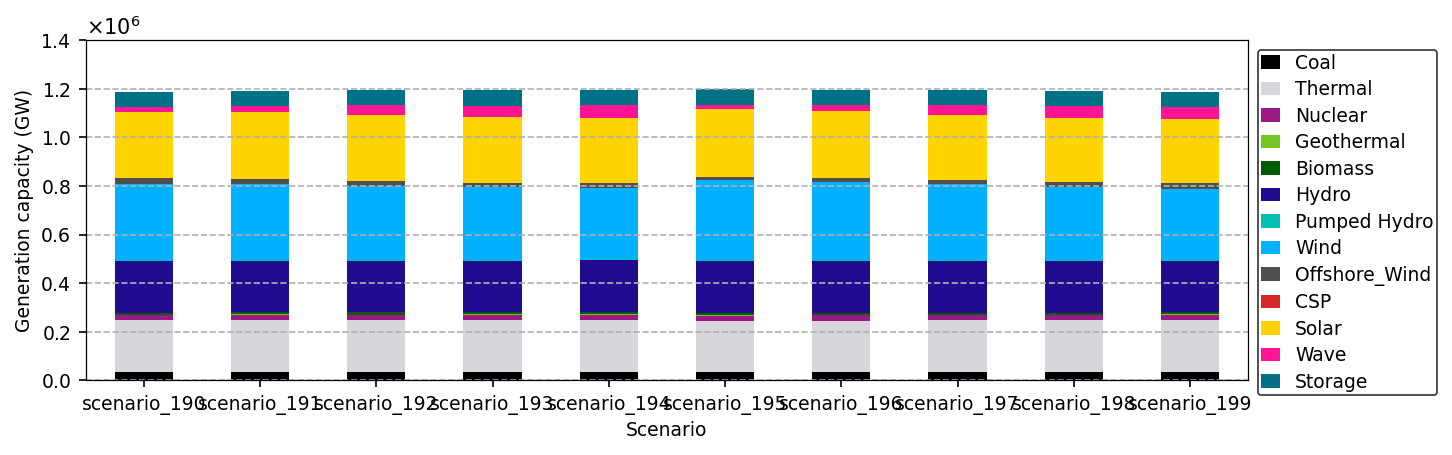

In [ ]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = gen_cap_ca_outca_by_scenario[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation capacity (GW)", fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Generation capacity (GW) out of California.png", transparent=False)

#Rename for spaces purposes
data=gen_cap_ca_outca_by_scenario.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
data.T.to_latex(folder_to_save_results+"Generation capacity (GW) out of California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Generation capacity (GW) out of California")

#Show dataframe
gen_cap_ca_outca_by_scenario

In [ ]:
#Computing percentages
x=np.zeros((len(scenario_name),len(gen_cap_ca_outca_by_scenario.columns)))
for c in range(0,len(scenario_name)):
    for tec in range(0,len(gen_cap_ca_outca_by_scenario.columns)):
      x[c,tec]=100*gen_cap_ca_outca_by_scenario.loc[scenario_name[c],gen_cap_ca_outca_by_scenario.columns[tec]]/gen_cap_ca_outca_by_scenario.loc[scenario_name[c],gen_cap_ca_outca_by_scenario.columns[len(gen_cap_ca_outca_by_scenario.columns)-1]]

gen_cap_ca_outca_by_scenario_percentage=pd.DataFrame(x,columns=gen_cap_ca_outca_by_scenario.columns,index=[scenario_name])

data=gen_cap_ca_outca_by_scenario_percentage.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)

data.T.to_latex(folder_to_save_results+"Generation capacity (percentage) out of California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Generation capacity (percentage) out of California")
data

NameError: name 'gen_cap_ca_outca_by_scenario' is not defined

In [4]:
curtailment = pd.read_csv('curtailment_mwh_per_scenario.csv',index_col=0)
curtailment

,1,2,3,4,5
1,"1,975,384,863.84","1,967,801,464.75","1,810,413,803.47","1,688,960,023.30","1,630,339,711.17"
2,"1,964,898,965.98","1,957,746,114.88","1,804,592,352.01","1,689,070,524.46","1,630,987,597.50"
3,"1,950,084,150.16","1,940,909,545.03","1,798,540,698.76","1,689,411,629.97","1,632,933,546.00"
4,"1,913,291,510.49","1,904,972,615.00","1,795,055,713.39","1,689,078,461.63","1,626,673,263.39"
5,"1,903,168,314.98","1,900,069,812.37","1,782,340,669.87","1,707,925,319.17","1,634,370,924.79"


In [5]:
curtailment_by_scen_list = []
for i in range(1,len(curtailment)+1):
    row_list = curtailment.loc[i, :].values.flatten().tolist()
    curtailment_by_scen_list = curtailment_by_scen_list + row_list

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
y3 = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
z3 = np.zeros(25)

dx = np.ones(25)
dy = np.ones(25)
dz = [x//1000000 for x in curtailment_by_scen_list]

cmap = cm.get_cmap('PuRd')
norm = Normalize(vmin=round(min(dz),0), vmax=round(max(dz),1))
colors = cmap(norm(dz))

sc = cm.ScalarMappable(cmap=cmap,norm=norm)
sc.set_array([])
cbar = plt.colorbar(sc, fraction=0.03, pad = 0.15)
cbar.ax.set_ylabel('Curtailment (TWh)', rotation=270, fontsize = 8, labelpad=18)
cbar.ax.tick_params(labelsize=8)

ax1.bar3d(x3, y3, z3, dx, dy, dz, color=colors)

ax1.set_xlabel('Floating Offshore Wind\nEnergy Overnight Costs',fontsize=8, labelpad=20)
ax1.set_ylabel('Wave Energy\nOvernight Costs',fontsize=8, labelpad=20)
ax1.set_zlabel('WECC-Wide Curtailment in 2050 (TWh)',fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8)

x_labels = [item.get_text() for item in ax1.get_xticklabels()]
x_labels[1] = '$4,746/kW'
x_labels[2] = '$4,458/kW'
x_labels[3] = '$3,468/kW'
x_labels[4] = '$3,017/kW'
x_labels[5] = '$2,728/kW'
ax1.set_xticklabels(x_labels)
plt.setp(ax1.get_xticklabels(), rotation=30)

y_labels = [item.get_text() for item in ax1.get_yticklabels()]
y_labels[3] = '$1,462/kW'
y_labels[4] = '$1,333/kW'
y_labels[5] = '$760/kW'
y_labels[6] = '$618/kW'
y_labels[7] = '$400/kW'
ax1.set_yticklabels(y_labels)
plt.setp(ax1.get_yticklabels(), rotation=-10)

plt.show()

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_4364/3155422737.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_4364/3155422737.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_labels)
